In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

path = 'C:/Users/cfcoo/OneDrive - Ulster University/Ciaran/medium/figures'

dataset = np.random.default_rng().uniform(60,95,(20,4))
df = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df.head()

,data1,data2,data3,data4
0,75.574493,71.816699,61.459032,64.285356
1,74.196671,85.529028,89.755646,84.845876
2,65.706237,60.749228,60.727232,68.722587
3,61.057610,81.711230,61.249395,60.684832
4,60.949673,94.692612,74.839943,89.176234


In [2]:
for n in range(1,df.columns.shape[0]+1):
    df.rename(columns={f"data{n}": f"Experiment {n}"}, inplace=True)
df.head()

,Experiment 1,Experiment 2,Experiment 3,Experiment 4
0,75.574493,71.816699,61.459032,64.285356
1,74.196671,85.529028,89.755646,84.845876
2,65.706237,60.749228,60.727232,68.722587
3,61.057610,81.711230,61.249395,60.684832
4,60.949673,94.692612,74.839943,89.176234


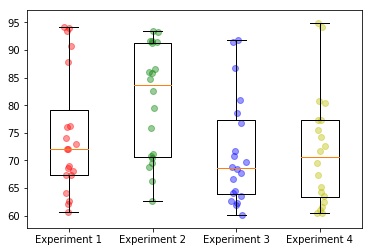

In [3]:
vals, names, xs = [],[],[]

for i, col in enumerate(df.columns):
    vals.append(df[col].values)
    names.append(col)
    xs.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
plt.boxplot(vals, labels=names)  
ngroup = len(vals)

palette = ['r', 'g', 'b', 'y'] 

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.show()

In [4]:
##### Set style options here #####
sns.set_style("whitegrid")  # "white","dark","darkgrid","ticks"

boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
flierprops = dict(marker='o', markersize=1,
                  linestyle='none')
whiskerprops = dict(color='#00145A')
capprops = dict(color='#00145A')
medianprops = dict(linewidth=1.5, linestyle='-', color='#01FBEE')  # colors median line

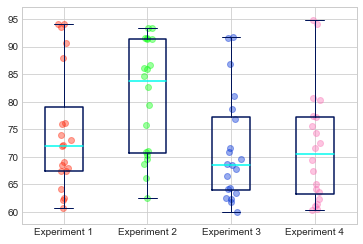

In [5]:
plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, flierprops=flierprops, medianprops=medianprops,
            showmeans=False)  # notch=True adds median notch
ngroup = len(vals)

palette = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5']

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.show()

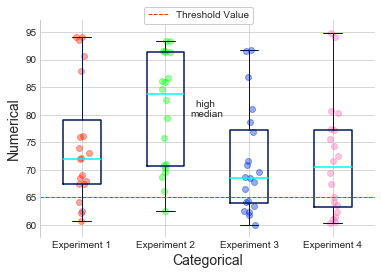

In [6]:
plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,
            capprops=capprops, flierprops=flierprops, medianprops=medianprops,
            showmeans=False)  # notch=True adds median notch
ngroup = len(vals)

palette = ['#FF2709', '#09FF10', '#0030D7', '#FA70B5']

for x, val, c in zip(xs, vals, palette):
    plt.scatter(x, val, alpha=0.4, color=c)
    
plt.xlabel("Categorical", fontweight='normal', fontsize=14)
plt.ylabel("Numerical", fontweight='normal', fontsize=14)

sns.despine(bottom=True) # removes right and top axis lines
plt.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='Threshold Value')
plt.legend(bbox_to_anchor=(0.31, 1.06), loc=2, borderaxespad=0., framealpha=1, facecolor ='white', frameon=True)

plt.text(2.5, 81, 'high \nmedian', ha='center', va='center', rotation='horizontal', fontsize=10)

plt.show()

In [4]:
"""
Part 2 - creating multiple scattered boxplots concurrently
"""
dataset = np.random.default_rng().uniform(60,95,(20,4))
df = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df.head()

dataset = np.random.default_rng().uniform(50,86,(20,4))
df_1 = pd.DataFrame(dataset, columns=['data1','data2','data3','data4'])
df_1.head()

,data1,data2,data3,data4
0,78.734253,62.496498,84.429089,61.501463
1,63.655556,77.231841,65.335897,67.338503
2,50.509018,73.541067,60.813202,83.284918
3,68.720515,54.736694,60.216493,82.797048
4,64.380235,80.657804,64.594836,74.945467


In [5]:
for n in range(1,df.columns.shape[0]+1):
    df.rename(columns={f"data{n}": f"Experiment {n}"}, inplace=True)
    df_1.rename(columns={f"data{n}": f"Experiment {n}"}, inplace=True)
df.head()

,Experiment 1,Experiment 2,Experiment 3,Experiment 4
0,76.520564,76.219513,75.846036,92.738944
1,61.472103,74.051012,64.267985,94.883692
2,81.108877,73.838804,76.872946,72.982445
3,89.100206,61.289249,91.621831,61.951437
4,88.474486,62.028855,94.850462,81.602538


In [6]:
namesA, valsA, xsA = [], [], []
namesB, valsB, xsB = [], [], []

for i, col in enumerate(df.columns):
    valsA.append(df[col].values)
    namesA.append(col)
    xsA.append(np.random.normal(i + 1, 0.04, df[col].values.shape[0])) 

for i, col in enumerate(df_1.columns):
    valsB.append(df_1[col].values)
    namesB.append(col)
    xsB.append(np.random.normal(i + 1, 0.04, df_1[col].values.shape[0]))

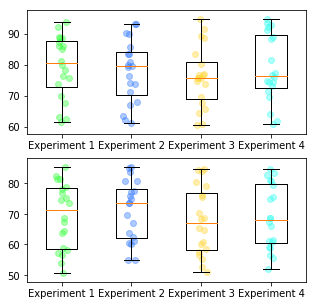

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, showmeans=False)  

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, showmeans=False) 

palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']

for xA, xB, valA, valB, c in zip(xsA, xsB, valsA, valsB, palette):
    ax1.scatter(xA, valA, alpha=0.4, color=c)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

In [8]:
boxpropsA = dict(linestyle='-', linewidth=1, color='#33B3FF')
flierpropsA = dict(marker='o', markersize=10,
                  linestyle='none', markeredgecolor='g')
whiskerpropsA = dict(color='#33B3FF')
cappropsA = dict(color='#33B3FF')
medianpropsA = dict(linewidth=1, linestyle='-', color='#33B3FF')  # colors median line

boxpropsB = dict(linestyle='-', linewidth=1, color='#FF4533')
flierpropsB = dict(marker='o', markersize=10, linestyle='none', markeredgecolor='g')
whiskerpropsB = dict(color='#FF4533')
cappropsB = dict(color='#FF4533')
medianpropsB = dict(linewidth=1, linestyle='-', color='#FF4533')  # colors median line

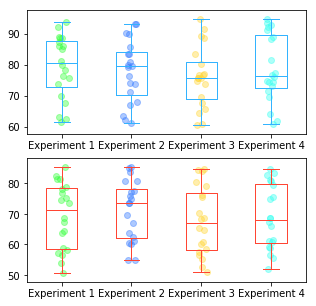

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, boxprops=boxpropsA, whiskerprops=whiskerpropsA,
            capprops=cappropsA, flierprops=flierpropsA, medianprops=medianpropsA,
            showmeans=False)  # notch=True adds median notch

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, boxprops=boxpropsB, whiskerprops=whiskerpropsB,
            capprops=cappropsB, flierprops=flierpropsB, medianprops=medianpropsB,
            showmeans=False)  # notch=True adds median notch


palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']

for xA, xB, valA, valB, c in zip(xsA, xsB, valsA, valsB, palette):
    ax1.scatter(xA, valA, alpha=0.4, color=c)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

Text(0.04,0.5,'Classification accuracy (%)')

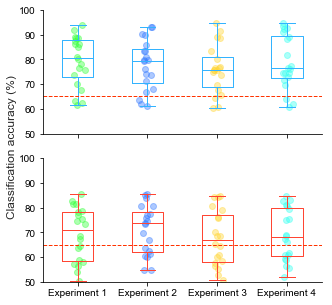

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5, 5))

bplot1 = ax1.boxplot(valsA, labels=namesA, notch=False, boxprops=boxpropsA, whiskerprops=whiskerpropsA,
            capprops=cappropsA, flierprops=flierpropsA, medianprops=medianpropsA,
            showmeans=False)  # notch=True adds median notch

bplot2 = ax2.boxplot(valsB, labels=namesB, notch=False, boxprops=boxpropsB, whiskerprops=whiskerpropsB,
            capprops=cappropsB, flierprops=flierpropsB, medianprops=medianpropsB,
            showmeans=False)  # notch=True adds median notch


palette = ['#33FF3B', '#3379FF', '#FFD633', '#33FFF1']
labels = [1,2,3,4,5,6]
for xA, xB, valA, valB, c, label in zip(xsA, xsB, valsA, valsB, palette, labels):
    ax1.scatter(xA, valA, alpha=0.4, color=c, label=label)
    ax2.scatter(xB, valB, alpha=0.4, color=c)

sns.set_style("whitegrid")

for ax in fig.get_axes():
    ax.label_outer()
    sns.despine(ax=ax)
    ax.set_ylim(50, 100)
    ax.axhline(y=65, color='#ff3300', linestyle='--', linewidth=1, label='chance accuracy')

fig.text(0.04, 0.5, 'Classification accuracy (%)', ha='center', va='center', rotation='vertical', fontsize=12)